In [3]:
cd ..

C:\Users\arebmann\Documents\Python Scripts\buecher_genres


In [5]:
from src.data import DataPreparation

In [29]:
train_prep = DataPreparation(file_path=r'.\daten\klappentext_train.txt',
                            label_file_path=r'.\daten\klappentext_train_label.txt')


In [8]:
label = train_prep.df_label

In [15]:
label_melt = label.melt(id_vars=['isbn'], value_vars=label.columns[1:].tolist()).dropna(subset=['value'])

<AxesSubplot:>

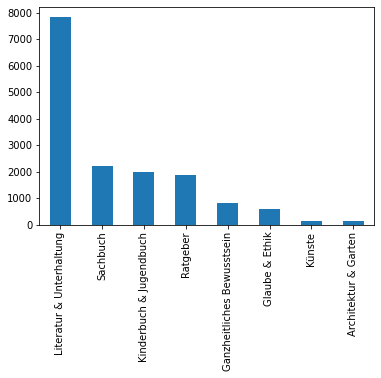

In [18]:
label_melt['value'].value_counts().plot(kind="bar")
# label imbalance is present

In [30]:
train = train_prep.df_text
train.info()
# there are null values in column body. remove those before training

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14548 entries, 0 to 14547
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14548 non-null  object 
 1   {http://www.w3.org/XML/1998/namespace}lang  14548 non-null  object 
 2   title                                       14548 non-null  object 
 3   body                                        14537 non-null  object 
 4   copyright                                   14548 non-null  object 
 5   categories                                  0 non-null      float64
 6   authors                                     14360 non-null  object 
 7   published                                   14548 non-null  object 
 8   isbn                                        14548 non-null  int64  
 9   url                                         14548 non-null  object 
dtypes: float64

In [23]:
train_label = train.merge(label, how='left', on='isbn')

In [24]:
(train_label[(train_label['body'].notna()) & (train_label[['body']].duplicated(keep=False))]
 .sort_values(['body', 'isbn'])[['title', 'body', 'isbn', 'topic0', 'topic1', 'topic2', 'topic3']])
# duplicate texts in dataset. in this case I will remove them all from the data, but otherwise should be discussed with experts

,title,body,isbn,topic0,topic1,topic2,topic3
11996,Zwölf tödliche Gaben 9,"Bloody, brilliant, MacBride – der Meister mörd...",9783641134389,Literatur & Unterhaltung,NaN,NaN,NaN
11101,Zwölf tödliche Gaben 10,"Bloody, brilliant, MacBride – der Meister mörd...",9783641134419,Literatur & Unterhaltung,NaN,NaN,NaN
2280,Hühnersuppe für die Seele,Canfield und Hansen wurden 1997 als die Nr. 1-...,9783442132096,Ganzheitliches Bewusstsein,NaN,NaN,NaN
12728,Hühnersuppe für die Seele,Canfield und Hansen wurden 1997 als die Nr. 1-...,9783442215461,Ganzheitliches Bewusstsein,NaN,NaN,NaN
7985,Rosch Haschana,Ein Gebetbuch ist der öffentlichste und zuglei...,9783579025995,Glaube & Ethik,NaN,NaN,NaN
9963,Jom Kippur,Ein Gebetbuch ist der öffentlichste und zuglei...,9783579074108,Glaube & Ethik,NaN,NaN,NaN
12692,Der kleine Drache Kokosnuss feiert Weihnachten,Es ist Winter und der kleine Drache Kokosnuss ...,9783570175644,Kinderbuch & Jugendbuch,NaN,NaN,NaN
10442,Der kleine Drache Kokosnuss feiert Weihnachten,Es ist Winter und der kleine Drache Kokosnuss ...,9783570175651,Kinderbuch & Jugendbuch,NaN,NaN,NaN
11485,Warum wir die Adventszeit lieben,Wie sieht der perfekte Adventskalender aus? Wa...,9783453604797,Sachbuch,NaN,NaN,NaN
7078,Alle Jahre wieder...,Wie sieht der perfekte Adventskalender aus? Wa...,9783453604803,Sachbuch,NaN,NaN,NaN


In [25]:
test_prep = DataPreparation(file_path=r'.\daten\klappentext_test.txt',
                            label_file_path=r'.\daten\klappentext_test_label.txt')


<AxesSubplot:>

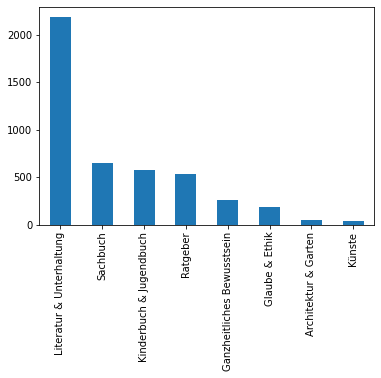

In [26]:
label_test = test_prep.df_label
label_melt = label_test.melt(id_vars=['isbn'], value_vars=label_test.columns[1:].tolist()).dropna(subset=['value'])
label_melt['value'].value_counts().plot(kind="bar")

In [28]:
test = test_prep.df_text
test_label = test.merge(label_test, how='left', on='isbn')
(test_label[(test_label['body'].notna()) & (test_label[['body']].duplicated(keep=False))]
 .sort_values(['body', 'isbn'])[['title', 'body', 'isbn', 'topic0', 'topic1', 'topic2', 'topic3']])
# no duplicates based on body

,title,body,isbn,topic0,topic1,topic2,topic3


In [31]:
test.info()
# no null values in body column of test set, but in authors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4157 non-null   object 
 1   {http://www.w3.org/XML/1998/namespace}lang  4157 non-null   object 
 2   title                                       4157 non-null   object 
 3   body                                        4157 non-null   object 
 4   copyright                                   4157 non-null   object 
 5   categories                                  0 non-null      float64
 6   authors                                     4115 non-null   object 
 7   published                                   4157 non-null   object 
 8   isbn                                        4157 non-null   int64  
 9   url                                         4157 non-null   object 
dtypes: float64(1